In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('train.csv')
data2 = pd.read_csv('test.csv')

print('Training Data for Model')
display(data1.head())
print('\nTesting Data for Model')
display(data2.head())

Training Data for Model


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Testing Data for Model


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df1 = data1.copy()
df2 = data2.copy()

display(df1.head())
display(df2.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df1.isnull().sum().sort_values(ascending=False).head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [5]:
df2.isnull().sum().sort_values(ascending=False).head()

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

In [6]:
for i in df1:
    if (df1[i].isnull().sum()/len(df1)).round(2)*100<30:
        if df1[i].dtypes != 'O':
            df1[i].fillna(df1[i].median(), inplace=True)
        else:
            df1[i].fillna(df1[i].mode()[0], inplace=True)
    else:
        df1.drop(i, axis=1, inplace=True)
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
for i in df2:
    if (df2[i].isnull().sum()/len(df2)).round(2)*100<30:
        if df2[i].dtypes != 'O':
            df2[i].fillna(df2[i].median(), inplace=True)
        else:
            df2[i].fillna(df2[i].mode()[0], inplace=True)
    else:
        df2.drop(i, axis=1, inplace=True)
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
cat = df1.select_dtypes(exclude='number')
num = df1.select_dtypes(include='number')

print('Categorical Data Values')
display(cat.head())
print('Numerical Data Values')
display(num.head())

Categorical Data Values


,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


Numerical Data Values


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = {}
for i in cat.columns:
    cEncoder = LabelEncoder()
    df1[i] = cEncoder.fit_transform(df1[i])
    encoder[i + '_encoder'] = cEncoder
    joblib.dump(cEncoder, open(f'{i}+_encoder.pkl', 'wb'))
encoder

{'Name_encoder': LabelEncoder(),
 'Sex_encoder': LabelEncoder(),
 'Ticket_encoder': LabelEncoder(),
 'Embarked_encoder': LabelEncoder()}

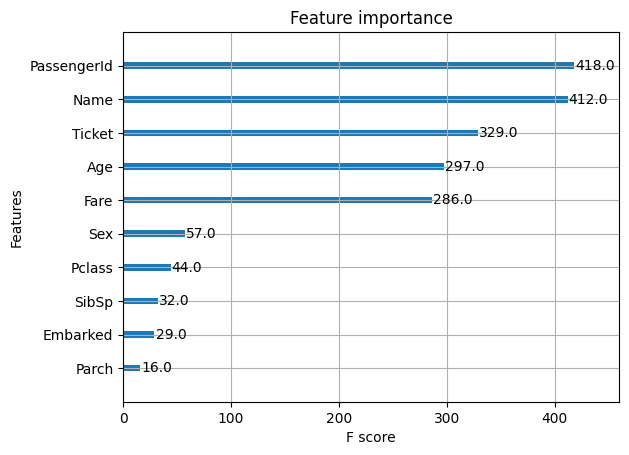

In [10]:
import xgboost as xgb
model = xgb.XGBClassifier()
x = df1.drop('Survived', axis=1)
y = df1.Survived
model.fit(x,y)

xgb.plot_importance(model)
plt.show()

In [11]:
sel_cols = ['PassengerId', 'Age', 'Fare', 'Sex', 'Survived']
df1 = df1[sel_cols]
df1

,PassengerId,Age,Fare,Sex,Survived
0,1,22.0,7.2500,1,0
1,2,38.0,71.2833,0,1
2,3,26.0,7.9250,0,1
3,4,35.0,53.1000,0,1
4,5,35.0,8.0500,1,0
...,...,...,...,...,...
886,887,27.0,13.0000,1,0
887,888,19.0,30.0000,0,1
888,889,28.0,23.4500,0,0
889,890,26.0,30.0000,1,1


In [27]:
from sklearn.model_selection import train_test_split
x = df1.drop('Survived',axis=1)
y = df1.Survived

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.3, random_state=41)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

dT_model = RandomForestClassifier()
dT_model.fit(xtrain, ytrain)

cross_validation= dT_model.predict(xtrain)
print(classification_report(cross_validation, ytrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       387
           1       1.00      1.00      1.00       236

    accuracy                           1.00       623
   macro avg       1.00      1.00      1.00       623
weighted avg       1.00      1.00      1.00       623



In [14]:
prediction = dT_model.predict(xtest)
print(classification_report(prediction, ytest))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       182
           1       0.63      0.78      0.70        86

    accuracy                           0.78       268
   macro avg       0.76      0.78      0.76       268
weighted avg       0.80      0.78      0.79       268



<Axes: >

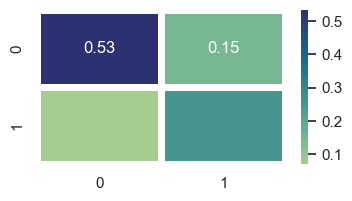

In [15]:
revealer = confusion_matrix(prediction, ytest)
plt.figure(figsize = (4,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=5)

In [16]:
joblib.dump(dT_model, open('TitanicModel.pkl', 'wb'))

In [17]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [18]:
sel_cols = ['PassengerId', 'Age', 'Fare', 'Sex']
df2 = df2[sel_cols]
df2

,PassengerId,Age,Fare,Sex
0,892,34.5,7.8292,male
1,893,47.0,7.0000,female
2,894,62.0,9.6875,male
3,895,27.0,8.6625,male
4,896,22.0,12.2875,female
...,...,...,...,...
413,1305,27.0,8.0500,male
414,1306,39.0,108.9000,female
415,1307,38.5,7.2500,male
416,1308,27.0,8.0500,male


In [19]:
cust_data = df2.iloc[:, :]
cust_data = pd.DataFrame(cust_data)
cust_data

,PassengerId,Age,Fare,Sex
0,892,34.5,7.8292,male
1,893,47.0,7.0000,female
2,894,62.0,9.6875,male
3,895,27.0,8.6625,male
4,896,22.0,12.2875,female
...,...,...,...,...
413,1305,27.0,8.0500,male
414,1306,39.0,108.9000,female
415,1307,38.5,7.2500,male
416,1308,27.0,8.0500,male


In [20]:
sex = joblib.load('Sex+_encoder.pkl')
model = joblib.load('TitanicModel.pkl')

In [21]:
cust_data['Sex'] = sex.transform(cust_data[['Sex']])

cust_data

,PassengerId,Age,Fare,Sex
0,892,34.5,7.8292,1
1,893,47.0,7.0000,0
2,894,62.0,9.6875,1
3,895,27.0,8.6625,1
4,896,22.0,12.2875,0
...,...,...,...,...
413,1305,27.0,8.0500,1
414,1306,39.0,108.9000,0
415,1307,38.5,7.2500,1
416,1308,27.0,8.0500,1


In [22]:
output = model.predict(cust_data)

In [25]:
submission = pd.DataFrame()
submission['PassengerId'] = df2['PassengerId']
submission['Survived'] = pd.Series(output)

In [26]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [33]:
submission.to_csv('File Submission.csv')

In [35]:
df = pd.read_csv('File Submission.csv')
df = df.reset_index(drop=True)
df.to_csv('File Submission.csv')

PermissionError: [Errno 13] Permission denied: 'File Submission.csv'